In [1]:
import sklearn
import numpy as np
import pandas as pd
import xgboost as xgb
import tensorflow as tf


Diabetes data set

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [52]:
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

In [53]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [54]:
import math
X = X * math.sqrt(442)

In [55]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-7.651999e-15,2.724819e-15,-1.687137e-14,2.700705e-15,-1.856735e-15,2.720800e-15,-9.609206e-15,8.150343e-15,-8.090060e-15,-7.153654e-15
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363066e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651046e+00,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706577e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-6.990157e-01,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192178e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-4.094666e-02,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493688e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,6.818695e-01,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776071e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808758e+00,2.851075e+00


In [56]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

<AxesSubplot:ylabel='Frequency'>

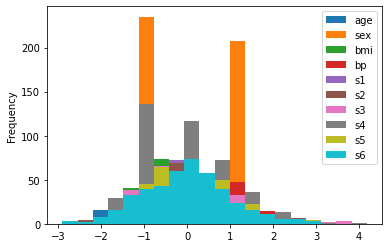

In [57]:
X.plot.hist(bins=20)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression With SKLearn

In [59]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression().fit(X_train, y_train)

In [60]:
from sklearn.metrics import mean_squared_error
import math

y_validation_hat = lr_model.predict(X_validation)
val_rmse = math.sqrt(mean_squared_error(y_validation, y_validation_hat))
y_train_hat = lr_model.predict(X_train)
train_rmse = math.sqrt(mean_squared_error(y_train, y_train_hat))


print("RMSE on training data: {}".format(train_rmse))
print("RMSE on validation data: {}".format(val_rmse))

RMSE on training data: 53.55881425327268
RMSE on validation data: 53.853256984914395


# Gradient Boost Tree with Xgboost

In [68]:
from xgboost import XGBRegressor

my_model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=3,
    gamma=10,
    min_child_weight=10,
    n_estimators=200, 
#     subsample=0.87,
    colsample_bynode=1,
#     colsample_bytree=0.9,
    reg_alpha=0,
    reg_lambda=3,
    
    booster='gbtree',
    tree_method='hist',
    missing=-1,
    verbosity=1
)

print(my_model.get_xgb_params())

trained = my_model.fit(
    X_train, y_train, early_stopping_rounds=10,
    # the last metric is used for early stopping
    eval_metric=["rmse"],
    eval_set=[(X_train, y_train), (X_validation, y_validation)], verbose=True
)


{'objective': 'reg:squarederror', 'base_score': None, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': 1, 'colsample_bytree': None, 'gamma': 10, 'gpu_id': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_delta_step': None, 'max_depth': 3, 'min_child_weight': 10, 'monotone_constraints': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': 0, 'reg_lambda': 3, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'hist', 'validate_parameters': None, 'verbosity': 1}
[0]	validation_0-rmse:157.33365	validation_1-rmse:148.61986
[1]	validation_0-rmse:144.35011	validation_1-rmse:136.29663
[2]	validation_0-rmse:132.74573	validation_1-rmse:125.11211
[3]	validation_0-rmse:122.43218	validation_1-rmse:115.12043
[4]	validation_0-rmse:113.20927	validation_1-rmse:106.47181
[5]	validation_0-rmse:104.99681	validation_1-rmse:98.47568
[6]	validation_0-rmse:97.72016	validation_1-rmse:91.62320
[7]	validation_0-rmse:91.27415	validation_1

# Linear Regression In Neural Network Style

In [62]:
import tensorflow as tf
from tensorflow import keras as keras
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Reshape, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import MeanSquaredError



In [10]:
def build_linear_regression():
    inputs = Input(shape=(10,))
    l = inputs    
    l = Dense(1, activation="linear", name='fc')(l)
    linear_regression_model = Model(inputs=inputs, outputs=l)
    print(linear_regression_model.summary())
    return linear_regression_model

def model_train(X_train, y_train, X_val, y_val, model):
    print(model.summary())
    early_stop = EarlyStopping(
        monitor="val_loss", min_delta=0, patience=3,
        verbose=0, mode="auto", baseline=None, restore_best_weights=True
    )
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=2, min_lr=0.05)

    callbacks_list = [early_stop, reduce_lr]

    # optimizer: gradient descent implementation
    adam_wn = Adam(learning_rate=0.8)
    
    # compile model with loss and optimizer; loss function needs to match the intention and the output of the last layer
    model.compile(
        loss="mean_squared_error", optimizer=adam_wn,
        metrics=[MeanSquaredError()]
    )
    
    # kick off model training
    return model.fit(
        x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=442,
        epochs=1000, verbose=1, shuffle=True,
        callbacks=callbacks_list)


In [63]:

my_lr_model = build_linear_regression()

model_train(X_train, y_train, X_validation, y_validation, my_lr_model)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
fc (Dense)                   (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
fc (Dense)                   (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10000
1/1 [=====================

Epoch 40/10000
1/1 [==============================] - 0s 20ms/step - loss: 17579.2715 - mean_squared_error: 17579.2715 - val_loss: 19450.1328 - val_mean_squared_error: 19450.1328
Epoch 41/10000
1/1 [==============================] - 0s 20ms/step - loss: 17395.8613 - mean_squared_error: 17395.8613 - val_loss: 19251.2637 - val_mean_squared_error: 19251.2637
Epoch 42/10000
1/1 [==============================] - 0s 19ms/step - loss: 17213.5840 - mean_squared_error: 17213.5840 - val_loss: 19049.7969 - val_mean_squared_error: 19049.7969
Epoch 43/10000
1/1 [==============================] - 0s 18ms/step - loss: 17032.5547 - mean_squared_error: 17032.5547 - val_loss: 18846.1641 - val_mean_squared_error: 18846.1641
Epoch 44/10000
1/1 [==============================] - 0s 18ms/step - loss: 16852.8984 - mean_squared_error: 16852.8984 - val_loss: 18640.7969 - val_mean_squared_error: 18640.7969
Epoch 45/10000
1/1 [==============================] - 0s 18ms/step - loss: 16674.7305 - mean_squared_erro

Epoch 86/10000
1/1 [==============================] - 0s 19ms/step - loss: 10819.5234 - mean_squared_error: 10819.5234 - val_loss: 11817.1963 - val_mean_squared_error: 11817.1963
Epoch 87/10000
1/1 [==============================] - 0s 17ms/step - loss: 10707.4082 - mean_squared_error: 10707.4082 - val_loss: 11700.9912 - val_mean_squared_error: 11700.9912
Epoch 88/10000
1/1 [==============================] - 0s 17ms/step - loss: 10596.5781 - mean_squared_error: 10596.5781 - val_loss: 11585.7539 - val_mean_squared_error: 11585.7539
Epoch 89/10000
1/1 [==============================] - 0s 19ms/step - loss: 10487.0215 - mean_squared_error: 10487.0215 - val_loss: 11471.4863 - val_mean_squared_error: 11471.4863
Epoch 90/10000
1/1 [==============================] - 0s 20ms/step - loss: 10378.7256 - mean_squared_error: 10378.7256 - val_loss: 11358.1904 - val_mean_squared_error: 11358.1904
Epoch 91/10000
1/1 [==============================] - 0s 19ms/step - loss: 10271.6816 - mean_squared_erro

Epoch 179/10000
1/1 [==============================] - 0s 18ms/step - loss: 4631.4692 - mean_squared_error: 4631.4692 - val_loss: 5057.0747 - val_mean_squared_error: 5057.0747
Epoch 180/10000
1/1 [==============================] - 0s 18ms/step - loss: 4599.4194 - mean_squared_error: 4599.4194 - val_loss: 5020.6533 - val_mean_squared_error: 5020.6533
Epoch 181/10000
1/1 [==============================] - 0s 18ms/step - loss: 4567.8730 - mean_squared_error: 4567.8730 - val_loss: 4984.7754 - val_mean_squared_error: 4984.7754
Epoch 182/10000
1/1 [==============================] - 0s 18ms/step - loss: 4536.8242 - mean_squared_error: 4536.8242 - val_loss: 4949.4331 - val_mean_squared_error: 4949.4331
Epoch 183/10000
1/1 [==============================] - 0s 18ms/step - loss: 4506.2646 - mean_squared_error: 4506.2646 - val_loss: 4914.6191 - val_mean_squared_error: 4914.6191
Epoch 184/10000
1/1 [==============================] - 0s 18ms/step - loss: 4476.1904 - mean_squared_error: 4476.1904 - 

Epoch 272/10000
1/1 [==============================] - 0s 21ms/step - loss: 3133.1099 - mean_squared_error: 3133.1099 - val_loss: 3287.0354 - val_mean_squared_error: 3287.0354
Epoch 273/10000
1/1 [==============================] - 0s 19ms/step - loss: 3127.2903 - mean_squared_error: 3127.2903 - val_loss: 3279.4673 - val_mean_squared_error: 3279.4673
Epoch 274/10000
1/1 [==============================] - 0s 18ms/step - loss: 3121.5906 - mean_squared_error: 3121.5906 - val_loss: 3272.0386 - val_mean_squared_error: 3272.0386
Epoch 275/10000
1/1 [==============================] - 0s 20ms/step - loss: 3116.0095 - mean_squared_error: 3116.0095 - val_loss: 3264.7471 - val_mean_squared_error: 3264.7471
Epoch 276/10000
1/1 [==============================] - 0s 19ms/step - loss: 3110.5447 - mean_squared_error: 3110.5447 - val_loss: 3257.5908 - val_mean_squared_error: 3257.5908
Epoch 277/10000
1/1 [==============================] - 0s 19ms/step - loss: 3105.1934 - mean_squared_error: 3105.1934 - 

Epoch 365/10000
1/1 [==============================] - 0s 18ms/step - loss: 2901.0627 - mean_squared_error: 2901.0627 - val_loss: 2955.4116 - val_mean_squared_error: 2955.4116
Epoch 366/10000
1/1 [==============================] - 0s 18ms/step - loss: 2900.3801 - mean_squared_error: 2900.3801 - val_loss: 2954.1741 - val_mean_squared_error: 2954.1741
Epoch 367/10000
1/1 [==============================] - 0s 18ms/step - loss: 2899.7144 - mean_squared_error: 2899.7144 - val_loss: 2952.9614 - val_mean_squared_error: 2952.9614
Epoch 368/10000
1/1 [==============================] - 0s 18ms/step - loss: 2899.0642 - mean_squared_error: 2899.0642 - val_loss: 2951.7722 - val_mean_squared_error: 2951.7722
Epoch 369/10000
1/1 [==============================] - 0s 18ms/step - loss: 2898.4297 - mean_squared_error: 2898.4297 - val_loss: 2950.6064 - val_mean_squared_error: 2950.6064
Epoch 370/10000
1/1 [==============================] - 0s 20ms/step - loss: 2897.8113 - mean_squared_error: 2897.8113 - 

Epoch 458/10000
1/1 [==============================] - 0s 17ms/step - loss: 2875.6055 - mean_squared_error: 2875.6055 - val_loss: 2902.4495 - val_mean_squared_error: 2902.4495
Epoch 459/10000
1/1 [==============================] - 0s 17ms/step - loss: 2875.5261 - mean_squared_error: 2875.5261 - val_loss: 2902.2561 - val_mean_squared_error: 2902.2561
Epoch 460/10000
1/1 [==============================] - 0s 17ms/step - loss: 2875.4485 - mean_squared_error: 2875.4485 - val_loss: 2902.0662 - val_mean_squared_error: 2902.0662
Epoch 461/10000
1/1 [==============================] - 0s 18ms/step - loss: 2875.3721 - mean_squared_error: 2875.3721 - val_loss: 2901.8806 - val_mean_squared_error: 2901.8806
Epoch 462/10000
1/1 [==============================] - 0s 18ms/step - loss: 2875.2976 - mean_squared_error: 2875.2976 - val_loss: 2901.6987 - val_mean_squared_error: 2901.6987
Epoch 463/10000
1/1 [==============================] - 0s 19ms/step - loss: 2875.2241 - mean_squared_error: 2875.2241 - 

Epoch 551/10000
1/1 [==============================] - 0s 19ms/step - loss: 2871.6274 - mean_squared_error: 2871.6274 - val_loss: 2894.7363 - val_mean_squared_error: 2894.7363
Epoch 552/10000
1/1 [==============================] - 0s 19ms/step - loss: 2871.6035 - mean_squared_error: 2871.6035 - val_loss: 2894.7180 - val_mean_squared_error: 2894.7180
Epoch 553/10000
1/1 [==============================] - 0s 19ms/step - loss: 2871.5796 - mean_squared_error: 2871.5796 - val_loss: 2894.7007 - val_mean_squared_error: 2894.7007
Epoch 554/10000
1/1 [==============================] - 0s 18ms/step - loss: 2871.5559 - mean_squared_error: 2871.5559 - val_loss: 2894.6841 - val_mean_squared_error: 2894.6841
Epoch 555/10000
1/1 [==============================] - 0s 18ms/step - loss: 2871.5325 - mean_squared_error: 2871.5325 - val_loss: 2894.6677 - val_mean_squared_error: 2894.6677
Epoch 556/10000
1/1 [==============================] - 0s 19ms/step - loss: 2871.5093 - mean_squared_error: 2871.5093 - 

In [64]:
math.sqrt(2894)

53.79591062525106

In [65]:
# give it a try: if you dont' scale the input features, it may be quite difficult to tune the NN